In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from category_encoders import BinaryEncoder

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [19]:
df = pd.read_csv('data_saudi_used_cars_cleaned.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5376,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5377,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5378,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5379,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


# **Business Problem Understanding**

## Background

Business in the used car industry is something lucrative. This applies anywhere, including in Saudi Arabia. In fact, according to the analysis from https://www.mordorintelligence.com/industry-reports/saudi-arabia-used-car-market, the industry in Saudi Arabia is currently thriving and is expected to continue growing until 2028. The used car business has tight competition but also offers opportunities to gain significant profits with relatively low capital. Success in this business requires in-depth skills and knowledge about cars. The business owners acquire quality used cars, make necessary repairs, and sell them at higher prices.

Used cars are an attractive option because they are more affordable than new cars. However, the process of buying or selling a used car can be a complicated task due to the various types of cars available, such as based on brand, transmission type, engine size, mileage, options, and manufacturing year. This is especially true when determining the best market price. 

Considering the possibilities, PT Yalla-Shoot Motor (a fictional company) that is currently involved in the business of selling new cars, wants to explore the field of selling used cars. As they are relatively new to this area, they need an initial model to predict the best market prices. They aim to sell the used cars at prices as close as possible to their real and deserved value, in order to penetrate a market dominated by major players by luring customers with an interesting deals. With this business strategy, they hope to increase the public's brand awareness of their latest business line.

Therefore, they hired Joni Ketapang (the writer of this project), a data scientist, to create a model based on data from syarah.com (a website for buying and selling cars) that will be used to build a predictive model for used car prices.

## Stakeholder

PT Yalla-Shoot Motor (a fictional company), a marketplace company for new cars that wanted to expand their line of business to the used cars industry.

## Problem Statement

One of the main challenges in the used car industry is estimating the prices of used cars for buyers or sellers who want to follow market trends. Determining the price of a used car based on the brand, engine type, manufacturing year, and other factors requires the expertise of a professional who understands the car's condition and appropriate pricing schemes based on previous experiences. In this situation, a model is needed to provide estimates of used car prices based on historical data.

1. What methods and models, that fits based on historical data, can we employ to forecast the prices of pre-owned cars in the Saudi Arabian market?
2. Which variables of available feature play a role in determining the prices of used cars in the Saudi Arabian market?

## Objectives

1. Create car pricpe prediction models for PT Yalla-Shoot Motor.
2. Finding which variables that is important/not important in the modelling.

## Analytic Approach and Metric Evaluation

**Analytic Approach**

Our task is to examine the data and identify distinctive patterns within the existing features. Afterward,  will construct a regression model that will serve as a predictive tool for used car prices, helping PT Yalla-Shoot avoid any overpriced or underpriced deals.

**Metric Evaluation**

To assess the model's performance, **which is a regression model**, the writer will use RMSE, MAE, and MAPE. RMSE calculates the root mean square of the errors, MAE computes the mean absolute error, and MAPE determines the mean percentage error generated by the regression model. Smaller values of RMSE, MAE, and MAPE indicate higher accuracy in predicting car prices based on the available feature limitations. Moreover, for the final linear model, we can utilize R-squared or adj. R-squared values, depending on what kind of models come out as champions. These will measure how well the model represents the overall data variance, with values closer to 1 indicating a better fit to the observed data, if the models are linear. However, these metrics are not valid for non-linear models.

# **Data Understanding**

## EDA

Exploratory Data Analysis (EDA) serves as a powerful tool to delve into the intricacies of our dataset, offering valuable insights and a foundational understanding of various aspects such as data distributions and the presence of null values. Undertaking an EDA will enable us to gain a deeper grasp of the data, ensuring a comprehensive exploration of its patterns and characteristics.

As previously mentioned, the "Price" column assumes the role of the target variable, while the remaining columns function as independent variables. These independent variables can be thoughtfully categorized into two distinct types: Numerical and Categorical variables.

Hence, let us thoughtfully segregate each type of variable:

* Numerical Variables: Year, Engine_Size, Mileage, Price

* Categorical Variables: Type, Region, Make, Gear_Type, Origin, Options, Negotiable

By conducting this systematic division, we aim to sharpen our analytical lens and extract valuable insights from both numerical and categorical dimensions, thereby fostering a more profound and enlightening exploration of the dataset.

### Overall Data Understanding

In [164]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]); 

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,307,"[Yukon, Range Rover, Optima, CX3, Cayenne S, S..."
1,Region,object,0,0.0,27,"[Riyadh, Hafar Al-Batin, Abha, Makkah, Dammam,..."
2,Make,object,0,0.0,54,"[GMC, Land Rover, Kia, Mazda, Porsche, Hyundai..."
3,Gear_Type,object,0,0.0,2,"[Automatic, Manual]"
4,Origin,object,0,0.0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,0.0,3,"[Full, Semi Full, Standard]"
6,Year,int64,0,0.0,24,"[2014, 2015, 2019, 2012, 2016, 2013, 2011, 200..."
7,Engine_Size,float64,0,0.0,63,"[8.0, 5.0, 2.4, 2.0, 4.8, 3.5, 5.7, 4.6, 4.0, ..."
8,Mileage,int64,0,0.0,1277,"[80000, 140000, 220000, 25000, 189000, 155, 11..."
9,Price,int64,0,0.0,352,"[120000, 260000, 42000, 58000, 85000, 48000, 8..."


Explanation of each column:

* Type: This column shows the exact type of each car. There are 307 unique values.
* Region: The area where the cars are sold. There are 27 unique values.
* Make: This column specifies the manufacturer of each car.
* Gear_Type: The type of gear for each car. There are 2 types: Automatic and Manual.
* Origin: Describes the origin region of the car.
* Options: Payment options available for purchasing the car. There are 3 types: Full, Semi-Full, Standard.
* Year: The production year of the car. There are 24 unique values.
* Engine_Size: The engine size of the car, ranging from 1.1 to 8.
* Mileage: Indicates the total distance traveled by the car before being sold. There are 1277 unique values.
* Price: The price of the car. There are 352 unique values.

### Distribution of Car Price and Plotting to Each Feature 

Text(0.5, 1.0, 'Car Price Distribution')

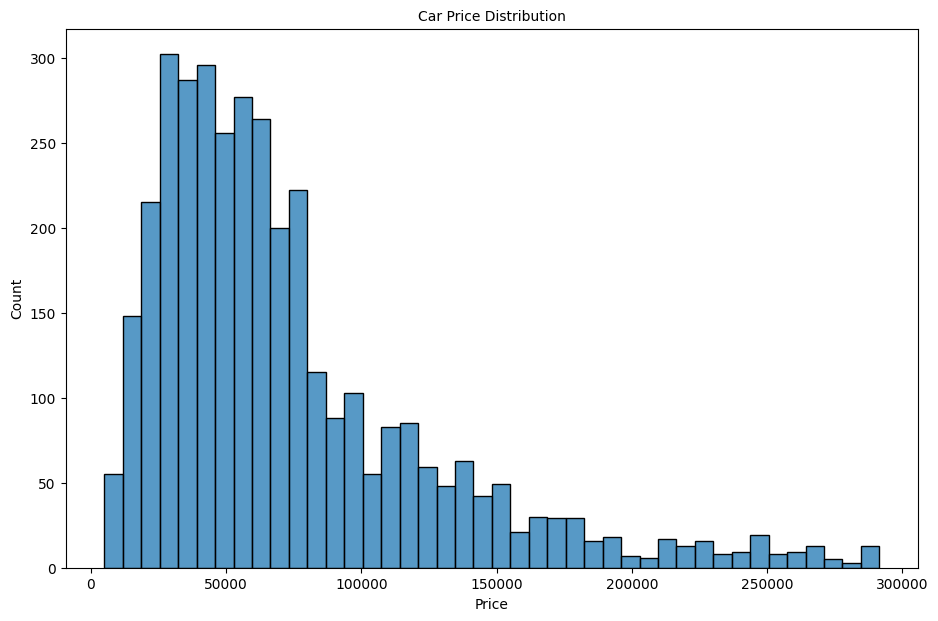

In [124]:
plt.figure(figsize = (11,7))
sns.histplot(df['Price'])
plt.title('Car Price Distribution', size=10)

The above plot indicates that the Price (that will be the Y of our model) of used cars exhibits a right-skewed distribution.

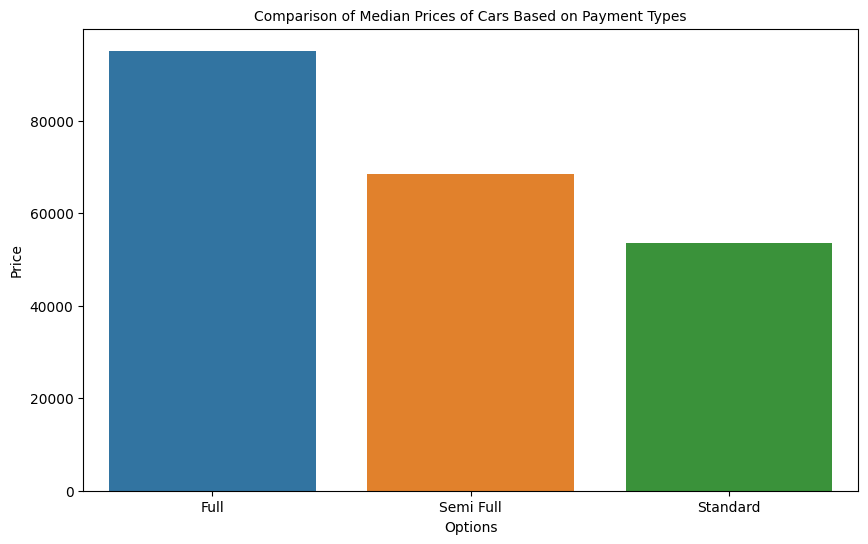

In [123]:
plt.figure(figsize=(10,6))
sns.barplot(x='Options', y='Price', data=df, errorbar=('ci', 0))
plt.title('Comparison of Median Prices of Cars Based on Payment Types', size=10)
plt.show()

Based on the data above, it is evident that the highest average price is found in the Full payment option category, followed by semi-full and standard.

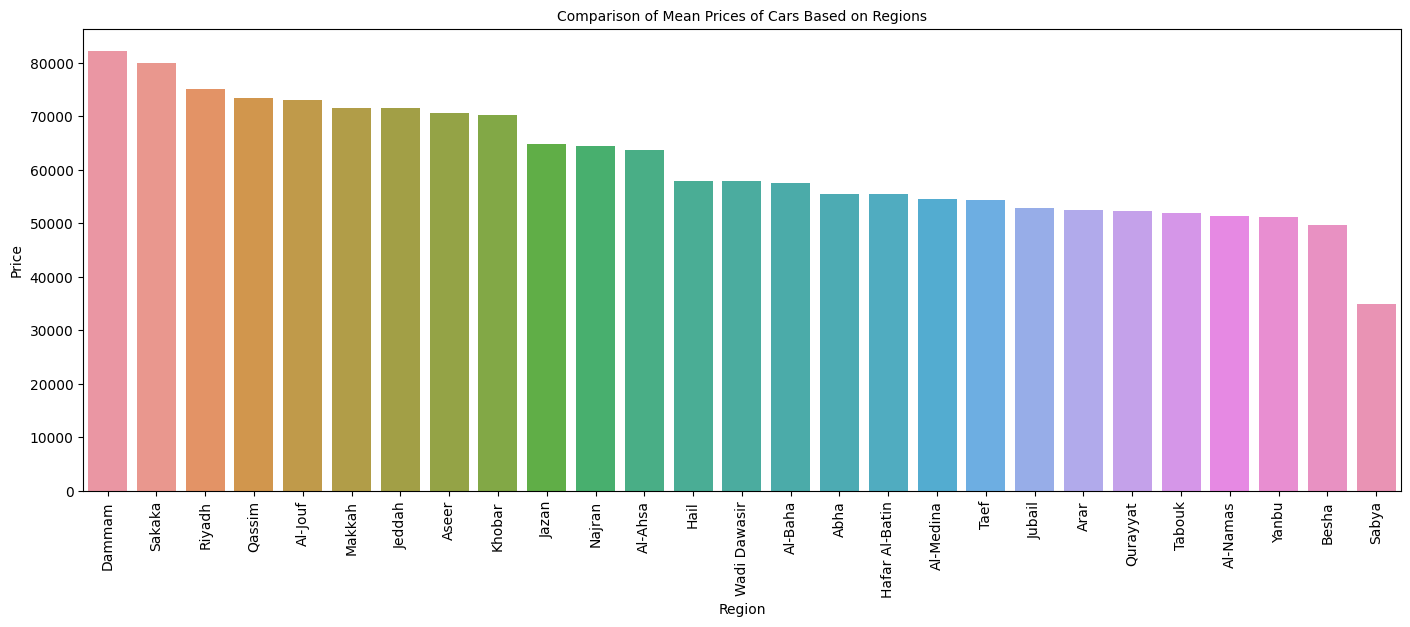

In [157]:
dfTemp = df.groupby('Region')['Price'].mean().reset_index().sort_values('Price',ascending=False)
plt.figure(figsize=(17,6))
#sns.barplot(x='Region', y='Price', data=df.sort_values('Price',ascending=False), errorbar=('ci', 0))
sns.barplot(x='Region', y='Price', data=dfTemp, errorbar=('ci', 0))
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.title('Comparison of Mean Prices of Cars Based on Regions', size=10)
plt.show()

Di atas adalah perbandingan rata-rata harga mobil per region.

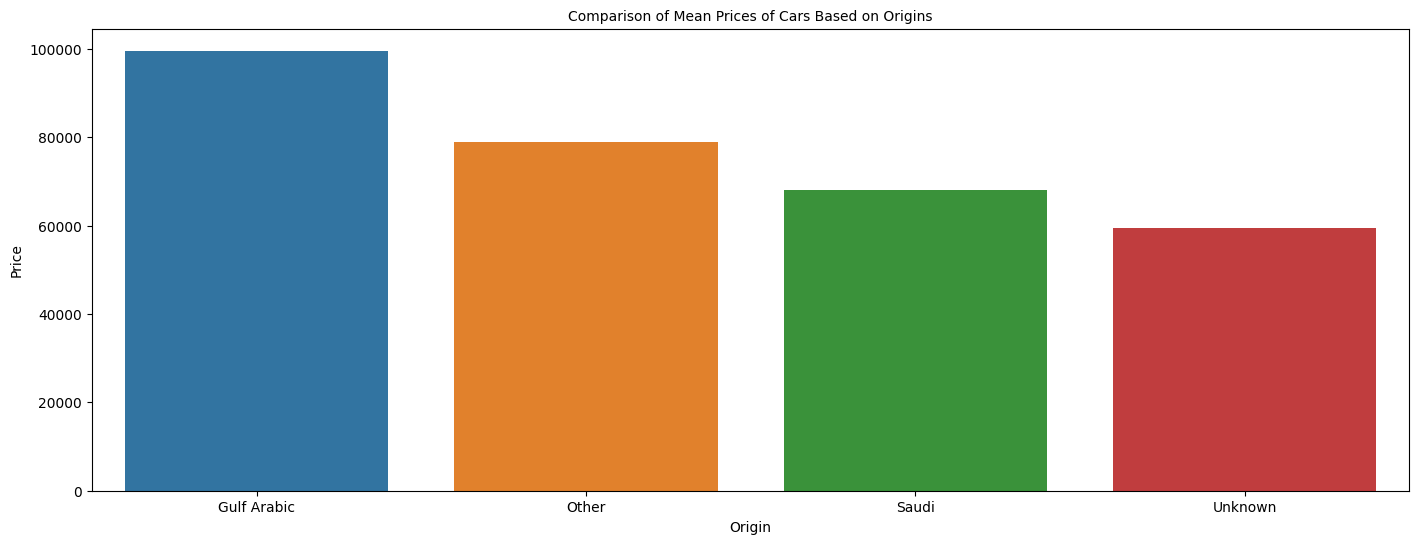

In [155]:
dfTemp2 = df.groupby('Origin')['Price'].mean().reset_index().sort_values('Price',ascending=False)
plt.figure(figsize=(17,6))
#sns.barplot(x='Region', y='Price', data=df.sort_values('Price',ascending=False), errorbar=('ci', 0))
sns.barplot(x='Origin', y='Price', data=dfTemp2, errorbar=('ci', 0))
plt.title('Comparison of Mean Prices of Cars Based on Origins', size=10)
plt.show()

Based on the data above, it is evident that the highest average price is found from the Gulf Arabic, followed by Other, Saudi, and Unknown.

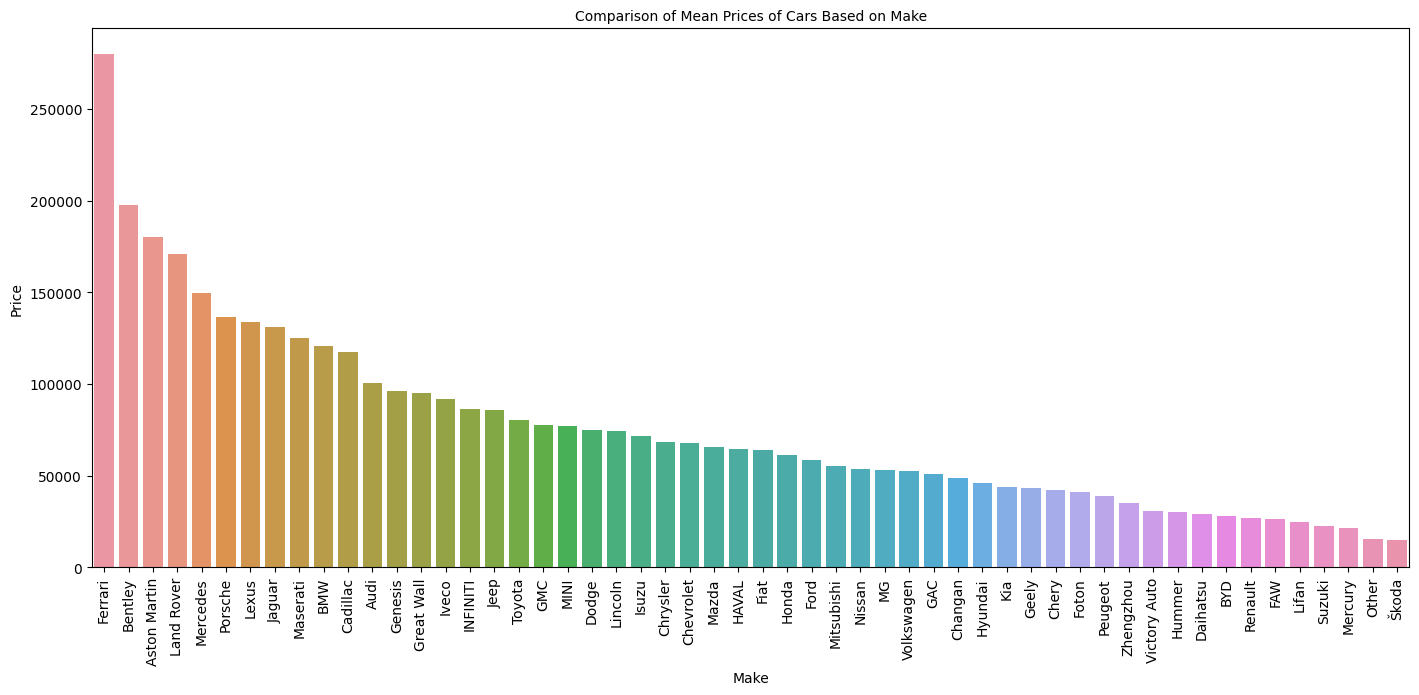

In [158]:
dfTemp3 = df.groupby('Make')['Price'].mean().reset_index().sort_values('Price',ascending=False)
plt.figure(figsize=(17,7))
sns.barplot(x='Make', y='Price', data=dfTemp3, errorbar=('ci', 0))
plt.xticks(rotation=90)
plt.title('Comparison of Mean Prices of Cars Based on Make', size=10)
plt.show()

above are the average price of each car maker.

### Correlation

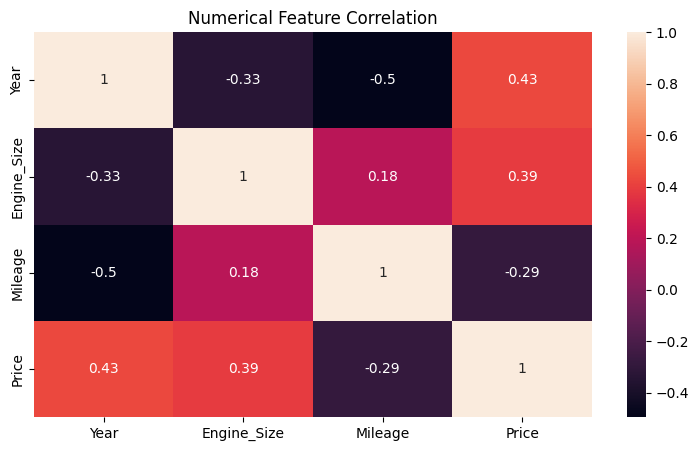

In [70]:
#Numerical Correlation
plt.figure(figsize=(9,5))

sns.heatmap(
    data=df[['Year','Engine_Size', 'Mileage', 'Price']].corr('spearman'),
    annot=True
)
plt.title('Numerical Feature Correlation')
plt.show()

### EDA Conclusion

Based on the analysis of various plot tables above, it can be concluded that each feature in the dataset exhibits specific patterns that have a significant influence on the price of the cars, as demonstrated through several plotting techniques such as histplot and barplot.

The "Type" column, with its 307 unique values, demonstrates how different car types command varying price ranges due to their individual characteristics and market demands, as evident from the histplot showcasing the distribution of prices across the types. Similarly, the "Region" column, with 27 distinct regions, indicates that location plays a crucial role in determining car prices, with certain areas showing higher demand or preferences for specific car types, as depicted in the barplot highlighting price variations across regions.

The "Make" column, describing the manufacturers, showcases how the reputation and brand value of a carmaker can impact pricing decisions, as seen in the barplot illustrating average prices for different manufacturers. Moreover, the "Gear_Type" column, distinguishing between "Automatic" and "Manual" options, illustrates how the type of transmission affects car prices, with automatic cars often commanding a premium due to their convenience, as evident from the histplot comparing price distributions between the two gear types.

The "Origin" column, detailing the car's country of origin, reveals how the perceived quality and reputation of a nation's automotive industry can influence pricing, as shown in the barplot indicating price variations across different countries. Additionally, the "Options" column, offering three payment choices, demonstrates that the level of features or add-ons available can affect pricing, with "Full" options typically being more expensive than "Standard" ones, as depicted in the histplot comparing prices based on available options.

Furthermore, the "Year" column, with 24 unique values, highlights how newer cars tend to have higher prices due to advancements in technology and improvements in design, as shown in the barplot representing average prices over the years. The "Engine_Size" column, covering a range from 1.1 to 8, showcases how the power and performance of the engine directly impact car prices, with larger engine sizes often correlating with higher costs, as evident from the histplot displaying the relationship between engine sizes and prices.

Lastly, the "Mileage" column, with 1277 unique values, reveals that the total distance a car has traveled before being sold can significantly influence its price, with lower mileage generally associated with higher values, as depicted in the histplot illustrating the distribution of prices based on mileage categories.

In summary, through the use of various plotting techniques as shown above, it becomes evident that each column's value contributes greatly to the price column, and understanding these relationships is essential for accurate pricing strategies, market analysis, and informed decision-making in the automotive industry.

# **Modeling**

## Feature Selection 

In [20]:
df = df.drop(df[df['Negotiable']==True].index)
df = df.drop('Negotiable',axis=1)
df = df.drop(df[df['Price']==0].index)
df = df.drop(df[df['Price']==1].index)
df = df.drop(df[df['Price']<5000].index)

* Based on the author's domain knowledge: every features available, aside from the 'negotiable' column, from the datasets will contributes to determining car's value.
* From another research, the writer found out that most used car price start at 5000 Arab Riyal. So cars that priced below those treshold will be removed from datasets. 
* The **Negotiable** feature is also dropped because the cars to be (and that can only be) predicted are cars with a status of **Non-Negotiable**. Hence, cars with the price of **0** (which represent non-negotiable) also be dropped.
* Since the datasets is already clean and ready to be used, there will be no other changes conducted.

## Feature Engineering

**Scaling** 

Scaling is a data transformation process used in a dataset to ensure that numerical values are within a specific range. The main purpose is to create fair comparisons between variables that have different units or ranges. In the context of machine learning, scaling is particularly useful for algorithms sensitive to varying data scales, like regression algorithms. Moreover, scaling can optimize algorithm performance, reduce computation time, and improve model interpretability.

In the dataset, there are two features, **Year** (representing the manufacturing year) and **Mileage**, with significantly different value ranges. To address this, the author applies the Robust Scaler to these features. This method effectively handles data with outlier values and skewed distributions, reducing the influence of extreme values on the analysis results.


**Encoding**  

Encoding is the process of converting data from one format to another, typically done on categorical data to transform it into numerical data before it can be used to train a model.

In the dataset, there are several features that are categorical data, requiring encoding to convert them. Two encoding methods are used:

1. **One-Hot Encoding**: **Gear_Type, Origin, Options** - This encoding is applied because these features are categorical variables with fewer than 6 categories. One-Hot Encoding is preferred over Binary Encoding because the number of categories is not too large.

2. **Binary Encoding**: **Type, Region, and Make** - This encoding method is used for these features as they are nominal variables with a large number of categories. Binary Encoding is chosen over One-Hot Encoding because it creates fewer dummy variables, reducing overfitting that may occur when using an excessive number of variables to build the model.

**Engine_Size** feature won't be encoded because the value is already on a small range. 

In [21]:
BE_pipeline = Pipeline([
    ('BE_Pipeline',BinaryEncoder())
])
OneHot_pipeline = Pipeline([
    ('OneHot_Pipeline',OneHotEncoder())
])

In [23]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Type', 'Region', 'Make']),
    ('scaler', RobustScaler(), ['Year', 'Mileage'])
], remainder='passthrough')

## Train-Test Splitting

Let's define the variables x and y first. In regression modeling, x represents the independent variables used to predict the value of the dependent variable y, which is the variable we want to predict.

* X = Type, Region, Make, Gear_Type, Origin, Options, Year, Engine_Size, Mileage

* y = Price

The dataset is then divided into two parts: 70% for training data and 30% for testing data. The training data is utilized to train the machine learning model, while the testing data is used to assess the performance of the trained model.

In [24]:
# Memisahkan data independen variabel dengan target
X = df.drop(['Price'], axis=1)
y = df['Price']

In [25]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=98)

## Model Benchmarking with Cross-Validation 

We utilize cross-validation in regression models to benchmark their performance and obtain more reliable and unbiased estimates of their predictive capabilities. In the context of regression, cross-validation involves dividing the available data into multiple subsets or folds where each fold contains both input features and corresponding target values. The model is trained on some folds and evaluated on the remaining ones. This process is repeated several times, ensuring that each data point is used for both training and testing in different iterations.

Cross-validation serves several specific purposes for regression models:

Efficient Data Usage: Since regression datasets are often limited, cross-validation allows us to make the most of the available data by repeatedly using different subsets for training and testing, optimizing data utilization.

Overfitting Detection: It helps us assess whether the regression model is overfitting the data. By evaluating the model's performance on multiple test sets, cross-validation provides a more robust indication of how well the model generalizes to unseen data.

Model Selection and Hyperparameter Tuning: In regression tasks, we may consider different algorithms or tune hyperparameters to improve model performance. Cross-validation aids in comparing various regression models and selecting the best-performing one for a specific problem.

Unbiased Performance Estimates: Cross-validation averages out the performance over multiple runs, reducing the influence of random data partitioning. This results in more accurate and unbiased performance estimates for the regression model.

By employing cross-validation in regression models, we gain valuable insights into their predictive abilities, robustness, and suitability for the given task, enabling us to make well-informed decisions to improve regression model performance.

### Standalone Models

After dividing the dataset into training and testing data, we will choose a benchmark model to serve as a reference for comparison. The benchmarking regression models include:

* Linear Regression: Used to establish a linear relationship between one or multiple input variables and the target variable.

* Lasso Regression: Helps reduce overfitting by adding the absolute value of coefficients as regularization, allowing some coefficients to be set to zero and considering only essential features.

* Ridge Regression: Reduces overfitting by adding the squared value of coefficients as regularization.

* KNN Regression: Utilizes the K-Nearest Neighbors (KNN) algorithm, finding the closest K neighbors from input data to predict the numeric target variable.

* Decision Tree Regression: Represents a regression model in the form of a decision tree structure, comprising nodes and edges.

* Random Forest Regression: Builds multiple decision trees randomly, using different subsets of training data and random subsets of features. Each tree is generated with bootstrap sampling and feature bagging techniques.

* XGBoost Regression: Uses gradient boosting with ensemble learning to create the regression model.

To assess model performance, we employ K-fold cross-validation, dividing the dataset into 5 equally sized partitions. The model is trained on 4 partitions and tested on the remaining one, repeating this process 5 times with different partitions for validation and training data. The overall model performance is then evaluated based on the average performance. This technique is valuable for avoiding overfitting or underfitting and improving model generalization.

In [26]:
# Define algoritma yang digunakan
lr = LinearRegression()
ls = Lasso(random_state=98)
rg = Ridge()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=98)
rf = RandomForestRegressor(random_state=98)
xgb = XGBRegressor(random_state=98)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_ls = TransformedTargetRegressor(ls, func=np.log, inverse_func=np.exp)
log_rg = TransformedTargetRegressor(rg, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_ls, log_rg, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-34593.11844071 -39458.75071687 -36489.86866344 -35560.82370872
 -32678.24544658] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


[-21363.85691653 -22770.38068662 -22025.49002691 -22987.59955943
 -20683.91308344] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.31233577 -0.38419501 -0.31413653 -0.36070343 -0.32047872] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-55641.06849842 -55222.70449227 -56150.79774821 -52575.12585805
 -53910.80146567] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso(random_state=98))
[-37398.31746032 -35780.79555688 -37454.58817384 -36098.34578254
 -37127.03010617] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso(random_state=98))
[-0.65190708 -0.65708323 -0.64074336 -0.66592632 -0.72880827] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                

In [27]:
# Evaluasi hasil dari 7 kandidat algoritma yang digunakan
SA_result = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': np.negative(nilai_mean_rmse),
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': np.negative(nilai_mean_mae),
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': np.negative(nilai_mean_mape),
    'Std_MAPE': nilai_std_mape
})

SA_result

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,35756.161395,2241.066101,21966.248055,860.297142,0.338370,0.028927
1,Lasso Regression,54700.099613,1296.269139,36771.815416,695.779079,0.668894,0.031045
2,Ridge,35752.480418,2232.047207,21953.721592,850.819320,0.338167,0.028710
3,KNN Regressor,27104.554268,1398.203639,17069.647868,871.796850,0.302971,0.027785
4,DecisionTree Regressor,35842.275156,4395.799704,20849.918075,2406.838804,0.355109,0.036657
5,RandomForest Regressor,25519.341708,2595.681091,14732.877199,957.437663,0.230312,0.013182
6,XGBoost Regressor,22957.258735,2107.269711,13619.605640,792.397387,0.215000,0.005548


***Disclaimer: R2 values are not displayed as not all of them are linear regression models. The R2 values will be shown later if the selected model is a linear regression model.***

### Voting 

Additionally, the writer will explore the fusion of multiple regression models to enhance prediction performance. In this approach, several regression models are trained on the same training data, and their predictions are then combined to produce the final prediction. Voting Regressor is used to combine it.

In [28]:
# Voting Regressor

LinReg=LinearRegression()
Lasso=Lasso(random_state=98)
Ridge=Ridge(random_state=98)
KNN=KNeighborsRegressor()
Tree=DecisionTreeRegressor(random_state=98)
Forest=RandomForestRegressor(random_state=98)
XGBoost= XGBRegressor(random_state=98)

vc=VotingRegressor([
  ('model1',LinReg),
  ('model2',Lasso),
  ('model3',Ridge),
  ('model4',KNN),
  ('model5',Tree),
  ('model6',Forest),
  ('model7',XGBoost)
])

score_R2_voting=[]
mean_R2_voting=[]
std_R2_voting=[]

score_RMSE_voting=[]
mean_RMSE_voting=[]
std_RMSE_voting=[]

score_MAE_voting=[]
mean_MAE_voting=[]
std_MAE_voting=[]

score_MAPE_voting=[]
mean_MAPE_voting=[]
std_MAPE_voting=[]

kfold=KFold(n_splits=5)

model_pipeline3=Pipeline([
('preprocess',transformer),
('model',vc)
])

# RMSE
model_cv_RMSE_voting=cross_val_score(model_pipeline3,X_train,y_train,cv=kfold,scoring='neg_root_mean_squared_error')
score_RMSE_voting.append(model_cv_RMSE_voting)
mean_RMSE_voting.append(model_cv_RMSE_voting.mean())
std_RMSE_voting.append(model_cv_RMSE_voting.std())

# MAE
model_cv_MAE_voting=cross_val_score(model_pipeline3,X_train,y_train,cv=kfold,scoring='neg_mean_absolute_error')
score_MAE_voting.append(model_cv_MAE_voting)
mean_MAE_voting.append(model_cv_MAE_voting.mean())
std_MAE_voting.append(model_cv_MAE_voting.std())

# MAPE
model_cv_MAPE_voting=cross_val_score(model_pipeline3,X_train,y_train,cv=kfold,scoring='neg_mean_absolute_percentage_error')
score_MAPE_voting.append(model_cv_MAPE_voting)
mean_MAPE_voting.append(model_cv_MAPE_voting.mean())
std_MAPE_voting.append(model_cv_MAPE_voting.std())

In [29]:
# Hasil evaluasi voting

voting_result = pd.DataFrame({
    'Model': ['Voting Regressor'],
    'Mean_RMSE': np.negative(mean_RMSE_voting),
    'Std_RMSE': std_RMSE_voting,
    'Mean_MAE': np.negative(mean_MAE_voting),
    'Std_MAE': std_MAE_voting,
    'Mean_MAPE': np.negative(mean_MAPE_voting),
    'Std_MAPE': std_MAE_voting
})
voting_result

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Voting Regressor,25548.772853,823.320556,17080.65117,725.067321,0.337426,725.067321


### Summary

In [30]:
pd.concat([SA_result,voting_result],axis=0).sort_values(['Mean_MAPE'], ascending=True)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
6,XGBoost Regressor,22957.258735,2107.269711,13619.605640,792.397387,0.215000,0.005548
5,RandomForest Regressor,25519.341708,2595.681091,14732.877199,957.437663,0.230312,0.013182
3,KNN Regressor,27104.554268,1398.203639,17069.647868,871.796850,0.302971,0.027785
0,Voting Regressor,25548.772853,823.320556,17080.651170,725.067321,0.337426,725.067321
2,Ridge,35752.480418,2232.047207,21953.721592,850.819320,0.338167,0.028710
0,Linear Regression,35756.161395,2241.066101,21966.248055,860.297142,0.338370,0.028927
4,DecisionTree Regressor,35842.275156,4395.799704,20849.918075,2406.838804,0.355109,0.036657
1,Lasso Regression,54700.099613,1296.269139,36771.815416,695.779079,0.668894,0.031045


Based on the evaluation above, both the Random Forest Regressor and XGBoost Regressor models outperform the other models, having the smallest mean RMSE, mean MAE, and mean MAPE values. Among them, the XGBoost Regressor stands out as the best-performing model. Smaller values of RMSE, MAE, and MAPE indicate higher prediction accuracy. Moreover, the standard deviation values of RMSE, MAE, and MAPE are relatively low, indicating consistent and reliable results.

Consequently, the **Random Forest Regressor** and **XGBoost Regressor** are considered the top two benchmark models for making predictions on the testing data.

### Model Prediction to Test Data

In [31]:
# Define the models
models = {
    'XGB': XGBRegressor(random_state=98),
    'RandomForest': RandomForestRegressor(random_state=98),}

score_rmse = []
score_mae = []
score_mape = []

# Perform benchmark evaluation
for model_name, model in models.items():
    # Create a pipeline with preprocessing, scaling, and the model
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    # Fit the pipeline to the training data
    pipe_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = pipe_model.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Append the scores to the respective lists
    score_rmse.append(rmse)
    score_mae.append(mae)
    score_mape.append(mape)

# Create a DataFrame to store the scores
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())

score_before_tuning

,RMSE,MAE,MAPE
XGB,23859.129904,14185.632197,0.238044
RandomForest,24608.874775,14141.576846,0.240666


After performing predictions on the testing data, the XGBoost model still outperforms the RandomForest model. However, for the purpose of further and more precise result comparison, both regressors will undergo Hyperparameter Tuning.

## Hyperparameter Tuning

**Hyperparameter tuning** is a critical step in **improving the performance** of our chosen model. Think of hyperparameters as settings that determine how the model learns from data. They play a significant role in making the model work effectively and avoiding common problems like overfitting or underfitting.

To do hyperparameter tuning, we **explore different combinations** of hyperparameter values, trying to find the best ones that give the model the highest accuracy and best predictions. We test various values for each hyperparameter, like the number of decision trees, the depth of each tree, or the learning rate, to see how they impact the model's performance.

By systematically experimenting with different combinations and evaluating each one using cross-validation, we can discover the optimal set of hyperparameters that leads to the best results. Once we find these ideal settings, we apply them to our model, making it more reliable and better suited for making accurate predictions on new, unseen data.

In essence, hyperparameter tuning helps us **fine-tune our model** like adjusting the knobs of a machine to achieve the best possible outcomes, making our predictions more trustworthy and robust.

We will now conduct hyperparameter tuning to search for the optimal parameter combinations in a machine learning model, aiming to improve its performance and accuracy. According to the metrics used, the Random Forest Regression model demonstrates superior performance during cross-validation, while the XGB and RandomForest model excels in predicting the testing data.

As a result, we will perform hyperparameter tuning for both models to enhance their performance. Eventually, we will select the best-performing model as our final choice.

### XGB

XGBoost Regressor is an ensemble technique that employs gradient boosting to combine multiple decision tree models with various data characteristics. Its primary goal is to reduce prediction variance and enhance prediction stability. Similar to Random Forest, XGBoost Regressor also adopts the majority voting approach to obtain the final prediction.

During hyperparameter tuning for the XGBoost Regressor model, the following parameters will be considered:

* n_estimators: This parameter represents the number of boosting rounds or decision trees that will be constructed during the XGBoost training process. The values tested during tuning range from 1 to 1000.

* learning_rate: The learning rate controls the step size at each iteration while moving towards a minimum of the loss function. A smaller learning rate can lead to more accurate predictions, but it may require a larger number of boosting rounds. Typical values for learning rate lie between 0.01 to 0.3.

* max_depth: Similar to the Random Forest, max_depth sets the maximum depth of each decision tree in the XGBoost ensemble. It controls the complexity of individual trees and can influence the risk of overfitting. Values tested during tuning range from 1 to 50.

* gamma: Gamma specifies the minimum loss reduction required to make a further partition on a leaf node of the tree. It acts as a regularization parameter. Values tested during tuning range from 0 to 20.

* colsample_bytree: This parameter determines the fraction of features (columns) used for training each decision tree. Similar to max_features in Random Forest, it helps in controlling overfitting. Values tested during tuning range from 0.1 to 1.

* alpha (L1 regularization): L1 regularization term on weights. It can be used in combination with L2 regularization to control feature selection. Values tested during tuning range from 0 to 20.

In [32]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [33]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=98, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 400,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 98  
)

In [34]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Mileage'])])),
                                             ('model',...
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=98, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [35]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
268,1.046217,0.012852,0.041685,0.005227,0.7,0.464159,158,6,0.14,9,...,536.309483,6,-0.240442,-0.279430,-0.255703,-0.271501,-0.282463,-0.265908,0.015753,17
173,1.838328,0.042863,0.037802,0.005771,0.6,10.0,183,6,0.07,10,...,648.510450,1,-0.224410,-0.265471,-0.230345,-0.244970,-0.264801,-0.246000,0.016999,5
199,1.118929,0.025639,0.037660,0.003653,0.8,0.059948,110,6,0.12,7,...,592.868469,7,-0.222490,-0.273702,-0.237097,-0.262381,-0.279085,-0.254951,0.021733,7
1,0.947629,0.025331,0.035059,0.003241,0.6,0.001,169,5,0.08,7,...,603.397964,11,-0.247325,-0.266931,-0.251513,-0.263964,-0.279571,-0.261861,0.011508,13
53,0.736066,0.004051,0.033002,0.005627,0.9,0.002783,139,6,0.11,8,...,741.208136,12,-0.247739,-0.285504,-0.262080,-0.271935,-0.287059,-0.270864,0.014763,20


### Predict to Test XGB

In [36]:
random_xgb.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('scaler', RobustScaler(),
                                                  ['Year', 'Mileage'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None,...
                              feature_types=None, gamma=10, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.07,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=183,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=98, ...))])

In [63]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=98)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuningxgb = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())

### Comparison Before and After Tuning 

In [77]:
pd.DataFrame({
    'Before':score_before_tuning.loc['XGB'],
    'After': [score_after_tuningxgb['RMSE'][0],score_after_tuningxgb['MAE'][0],score_after_tuningxgb['MAPE'][0]],
    'Delta': (score_before_tuning.loc['XGB']) - ([score_after_tuningxgb['RMSE'][0],score_after_tuningxgb['MAE'][0],score_after_tuningxgb['MAPE'][0]])
})

,Before,After,Delta
RMSE,23859.129904,22909.346424,949.783480
MAE,14185.632197,13425.587794,760.044403
MAPE,0.238044,0.222047,0.015997


there is a big improvement as in the decrease of value in either RMSE, MAE, or MAPE. The delta are as shown. This shows that the hyperparameter tuning works well and the purpose of doing given step are achieved.

### XGB Actual vs Prediction Plot

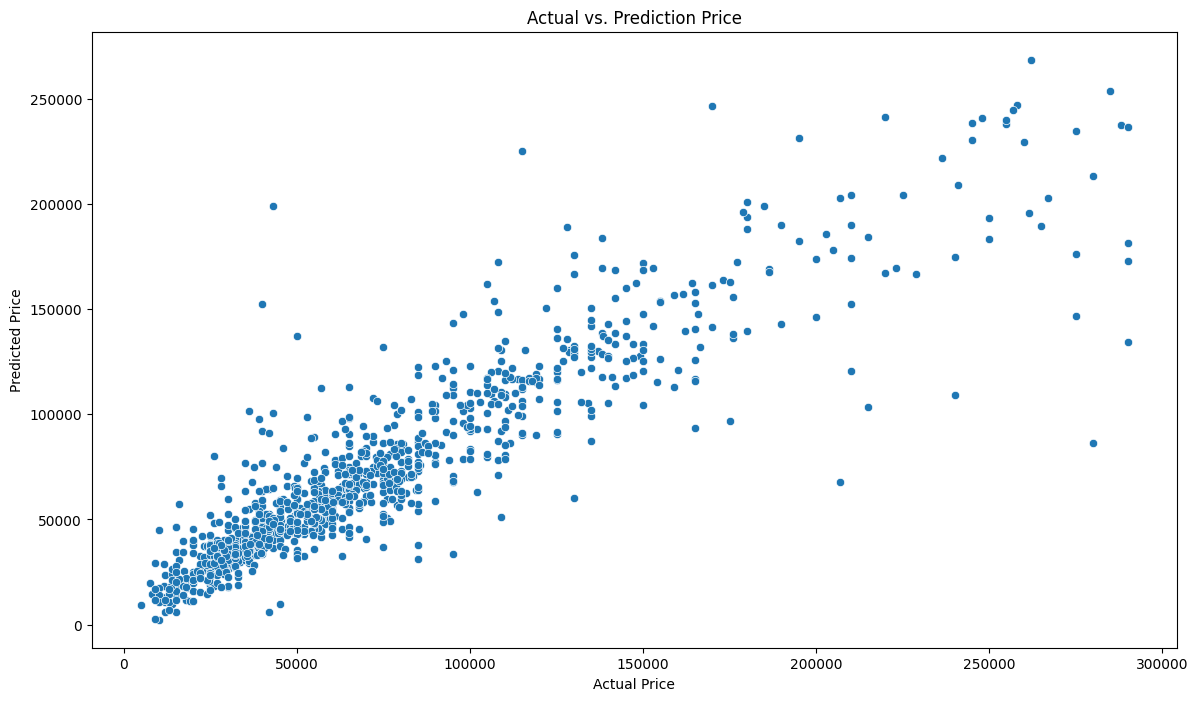

In [38]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

In [95]:
over_150 = len(df) - len(df[df['Price']<=150000])
print(f'The total number of cars with prices above 150,000 {over_150}, or {(over_150/len(df))*100}% from total data.')

The total number of cars with prices above 150,000 310, or 8.60871980005554% from total data.


The model's predictions for prices above 150,000 become more uncertain compared to those below the threshold because there is a limited number of cars with prices in that higher range. The scarcity of data points in the upper price bracket makes it challenging for the model to generalize effectively and accurately predict prices for such high-value vehicles. As a result, the predictions for cars above the threshold may exhibit greater variability or shakiness due to the lack of sufficient training examples in that price range.

### XGB Feature Importances

<Axes: title={'center': 'Feature Importances'}>

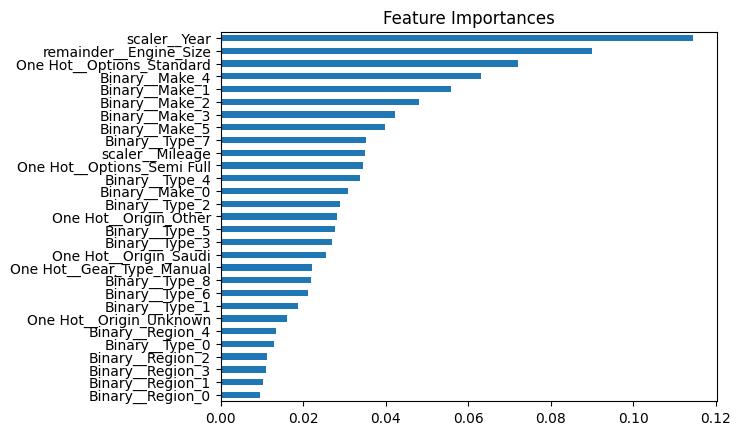

In [39]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances')

Upon analyzing the feature importance graph, a notable observation is that all the features hold significance in predicting the target variable. None of the features possess a value of 0, implying that each of them contributes meaningfully to the model's predictive power. This underscores the importance of the entire feature set in accurately forecasting the outcome, leaving no room for redundant or unimportant variables.

### XGB Residual Plot

,yTest,yPredXGB,residual
2890,55000,54556.136719,443.863281
4860,45000,44957.500000,42.500000
810,11000,13291.968750,-2291.968750
2960,45000,49957.652344,-4957.652344
412,138000,169706.453125,-31706.453125
...,...,...,...
4194,28000,30663.601562,-2663.601562
5244,115000,113128.234375,1871.765625
3089,65000,61085.382812,3914.617188
1956,42000,40781.597656,1218.402344


,yPredXGB,residual
2890,54556.136719,443.863281
4860,44957.500000,42.500000
810,13291.968750,-2291.968750
2960,49957.652344,-4957.652344
412,169706.453125,-31706.453125
...,...,...
4194,30663.601562,-2663.601562
5244,113128.234375,1871.765625
3089,61085.382812,3914.617188
1956,40781.597656,1218.402344


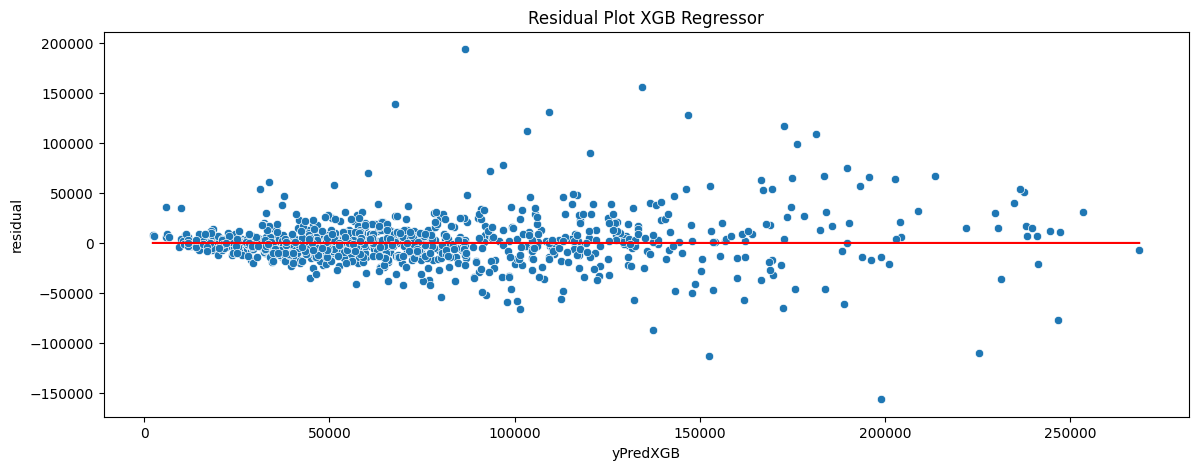

In [99]:
residual = y_test - y_pred_xgb_tuning

dfResidual = pd.DataFrame({'yPredXGB': y_pred_xgb_tuning,
                           'residual': residual})

dfResidualFull = pd.DataFrame({'yTest': y_test,
                               'yPredXGB': y_pred_xgb_tuning,
                               'residual': residual})
display(dfResidualFull,
        dfResidual)

plt.figure(figsize=(14,5))
sns.scatterplot(data=dfResidual, x='yPredXGB', y='residual')
sns.lineplot(data=dfResidual, x='yPredXGB', y=0, color='red')
plt.title('Residual Plot XGB Regressor')
plt.show()

In [163]:
over_150 = len(df) - len(df[df['Price']<=150000])
print(f'The total number of cars with prices above 150,000 is {over_150}, or {(over_150/len(df))*100}% from total data.')

The total number of cars with prices above 150,000 is 310, or 8.60871980005554% from total data.


Based on the residual plot above, the residuals appear to be clustered closely around the 0-150,000 range on the horizontal axis before scattering more widely (have a bigger residual margins). From this residual plot, we can infer that the XGBoost model is less optimal in predicting high-end cars (market prices >150,000). However, it's essential to consider other factors, such as the train set data being concentrated in the price range of 0-150,000 for a more accurate interpretation.

### **Random Forest**

Random Forest is an ensemble technique that combines various Decision Tree machine learning models with different data characteristics. Its objective is to reduce prediction variance and enhance prediction stability by using a majority voting approach. In Random Forest, the selection of candidate features for each tree split is done randomly.

During hyperparameter tuning for the Random Forest model, the following parameters will be considered:

* n_estimators: The number of decision trees constructed within the Random Forest, with values ranging from 1 to 1000.

* criterion: The function used to measure split quality, commonly MSE, MAE, Friedman MSE, or Poisson for regression tasks.

* max_depth: The maximum depth of each decision tree in the Random Forest, with values ranging from 1 to 50. Deeper trees increase the risk of overfitting.

* max_features: The maximum number of features used for splitting a node in each decision tree. Fewer features can help reduce overfitting.

* min_samples_split: The minimum number of data points required to split a node. Larger values decrease node splits and may reduce overfitting, but very high values could lead to underfitting. Values considered during tuning range from 2 to 20.

* min_samples_leaf: The minimum number of samples required in each decision tree leaf. Higher values can decrease the number of nodes and mitigate overfitting, but excessively high values might cause underfitting. Values tested during tuning range from 1 to 20.

* max_features: Random forest takes random subsets of features and tries to find the best split. max_features helps to find the number of features to take into account in order to make the best split.

* bootstrap: Bootstrapping is a statistical resampling technique that involves random sampling of a dataset with replacement.

In [41]:
# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Criterion
criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Minimum split
min_samples_split = list(np.arange(2, 11))

# Minimum Leaf
min_samples_leaf = list(np.arange(2, 5))

# Fitur Maximal
max_features =  ['auto', 'sqrt']

# Bootstrap Model
bootstrap =  [True, False]


# Hyperparam space XGboost
hyperparam_space_RF = { 
    'model__n_estimators': n_estimators,
    'model__criterion': criterion,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__max_features': max_features,
    'model__bootstrap': bootstrap
}

In [42]:
# Benchmark model dengan hyperparameter tuning
RF = RandomForestRegressor(random_state=1)

# Membuat algorithm chains
estimator_RF = Pipeline([
        ('preprocessing', transformer),
        ('model', RF)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_RF = RandomizedSearchCV(
    estimator_RF, 
    param_distributions = hyperparam_space_RF,
    n_iter = 150,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [43]:
# Fitting data training untuk mencari parameter terbaik
random_RF.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Mileage'])])),
                                             ('model',...
                                        'model__min_samples_leaf': [2, 3, 4],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=1, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [44]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_RF.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
74,1.975381,0.101488,0.062619,0.004232,122,7,3,auto,10,poisson,...,935.067338,1,-0.252409,-0.297387,-0.269271,-0.281611,-0.292968,-0.278729,0.016379,3
65,2.693590,0.112475,0.078420,0.003615,178,2,3,auto,9,poisson,...,887.504191,2,-0.257993,-0.303552,-0.272813,-0.285327,-0.297264,-0.283390,0.016490,4
15,2.043041,0.090690,0.066812,0.003897,157,9,4,auto,10,squared_error,...,834.999981,3,-0.255040,-0.306704,-0.271097,-0.298175,-0.303554,-0.286914,0.020305,7
146,0.781031,0.016711,0.058944,0.002584,139,3,3,sqrt,10,friedman_mse,...,466.913810,8,-0.317098,-0.374449,-0.314972,-0.371039,-0.392083,-0.353928,0.031761,42
25,1.782137,0.038194,0.054405,0.005743,142,2,3,auto,8,friedman_mse,...,825.596381,6,-0.265267,-0.318196,-0.278305,-0.307215,-0.317974,-0.297391,0.021676,10


In [45]:
random_RF.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('scaler', RobustScaler(),
                                                  ['Year', 'Mileage'])])),
                ('model',
                 RandomForestRegressor(criterion='poisson', max_depth=10,
                                       max_features='auto', min_samples_leaf=3,
                                       min_samples_split=7, n_estimators=122,
                                       random_state=1))])

### Predict to Test Set RF 

In [58]:
# Model XGBoost
model = {'RF': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
RF_tuning = random_RF.best_estimator_

# Fitting model
RF_tuning.fit(X_train, y_train)

# Predict test set
y_pred_RF_tuning = RF_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_RF_tuning = np.sqrt(mean_squared_error(y_test, y_pred_RF_tuning))
mae_RF_tuning = mean_absolute_error(y_test, y_pred_RF_tuning)
mape_RF_tuning = mean_absolute_percentage_error(y_test, y_pred_RF_tuning)

score_after_tuningRF = pd.DataFrame({'RMSE': rmse_RF_tuning, 'MAE': mae_RF_tuning, 'MAPE': mape_RF_tuning}, index=model.keys())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


### Comparison Before and After Tuning

In [78]:
pd.DataFrame({
    'Before':score_before_tuning.loc['RandomForest'],
    'After': [score_after_tuningRF['RMSE'][0],score_after_tuningRF['MAE'][0],score_after_tuningRF['MAPE'][0]],
        'Delta': (score_before_tuning.loc['RandomForest']) - ([score_after_tuningRF['RMSE'][0],score_after_tuningRF['MAE'][0],score_after_tuningRF['MAPE'][0]])
})

,Before,After,Delta
RMSE,24608.874775,25476.705259,-867.830484
MAE,14141.576846,14926.522406,-784.945560
MAPE,0.240666,0.242138,-0.001472


In contrast to XGBoost, tuning RandomForest actually resulted in poorer performance. There are increase in all three metrics of shown number. The possible cause could be the use of RandomSearchCV, which might not have captured the best combination of parameters and instead moved away from the default parameter combination used in Cross Validation.

### RF Actual vs Prediction Plot

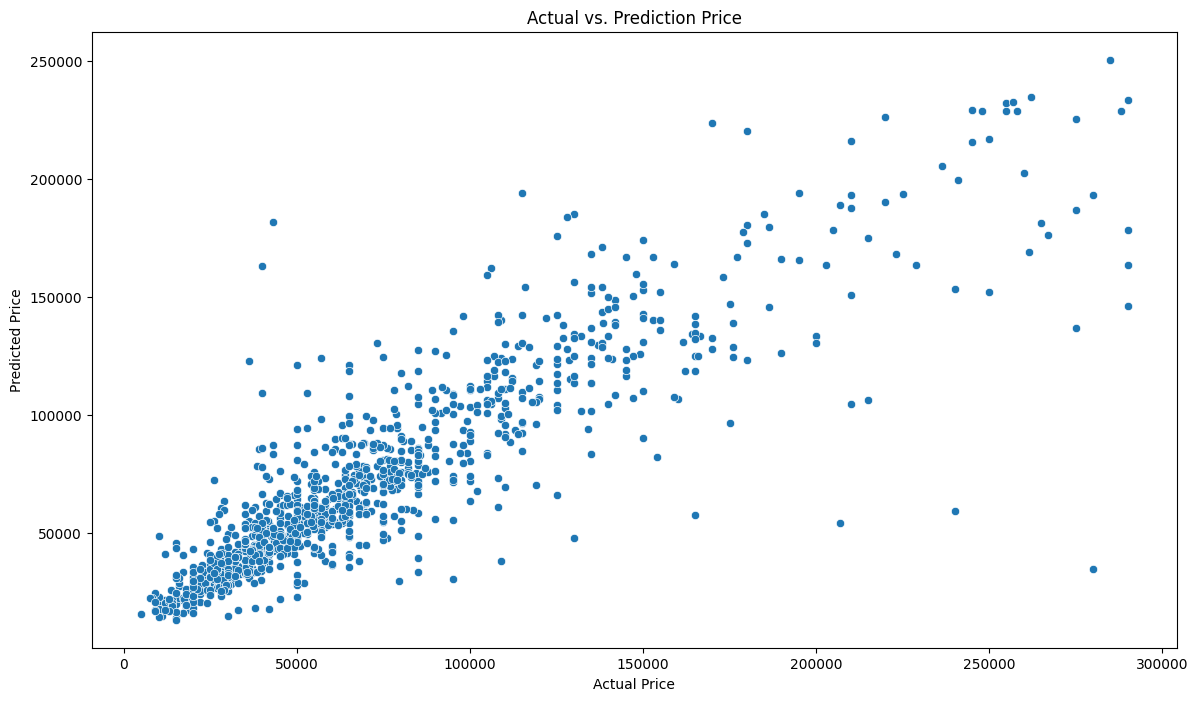

In [47]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_RF_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

In [106]:
over_150 = len(df) - len(df[df['Price']<=150000])
print(f'The total number of cars with prices above 150,000 {over_150}, or {(over_150/len(df))*100}% from total data.')

The total number of cars with prices above 150,000 310, or 8.60871980005554% from total data.


The model's predictions for prices above 150,000 become more uncertain compared to those below the threshold because there is a limited number of cars with prices in that higher range. The scarcity of data points in the upper price bracket makes it challenging for the model to generalize effectively and accurately predict prices for such high-value vehicles. As a result, the predictions for cars above the threshold may exhibit greater variability or shakiness due to the lack of sufficient training examples in that price range.

### RF Feature Importances

<Axes: title={'center': 'Feature Importances'}>

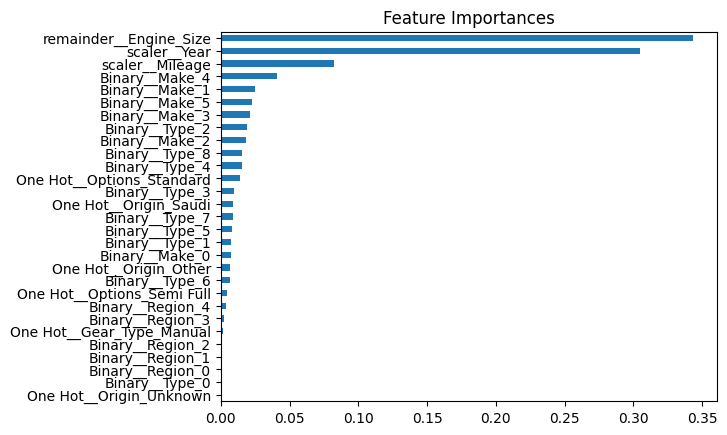

In [48]:
# Plot feature importances
feature_imp = pd.Series(RF_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances')

The analysis reveals that there are five insignificant features in the current model, while one feature, Engine_Size, stands out as highly influential. Armed with this information, the author contemplates reworking the model by dropping the insignificant features and conducting further tuning. However, due to hardware limitations, the decision is made not to pursue this route, as the potential outcome might only yield marginal improvements. Despite the presence of insignificant features, the significant impact of Engine_Size suggests that the model's predictive capability is already well-founded and refining it may not bring substantial gains given the hardware constraints.

### RF Residual Plot

,yTestBike,yPredRF,residual
2890,55000,64911.329763,-9911.329763
4860,45000,43218.861842,1781.138158
810,11000,14569.306113,-3569.306113
2960,45000,59018.409127,-14018.409127
412,138000,154267.673179,-16267.673179
...,...,...,...
4194,28000,25324.048629,2675.951371
5244,115000,96807.696666,18192.303334
3089,65000,70421.979656,-5421.979656
1956,42000,44063.398476,-2063.398476


,yPredRF,residual
2890,64911.329763,-9911.329763
4860,43218.861842,1781.138158
810,14569.306113,-3569.306113
2960,59018.409127,-14018.409127
412,154267.673179,-16267.673179
...,...,...
4194,25324.048629,2675.951371
5244,96807.696666,18192.303334
3089,70421.979656,-5421.979656
1956,44063.398476,-2063.398476


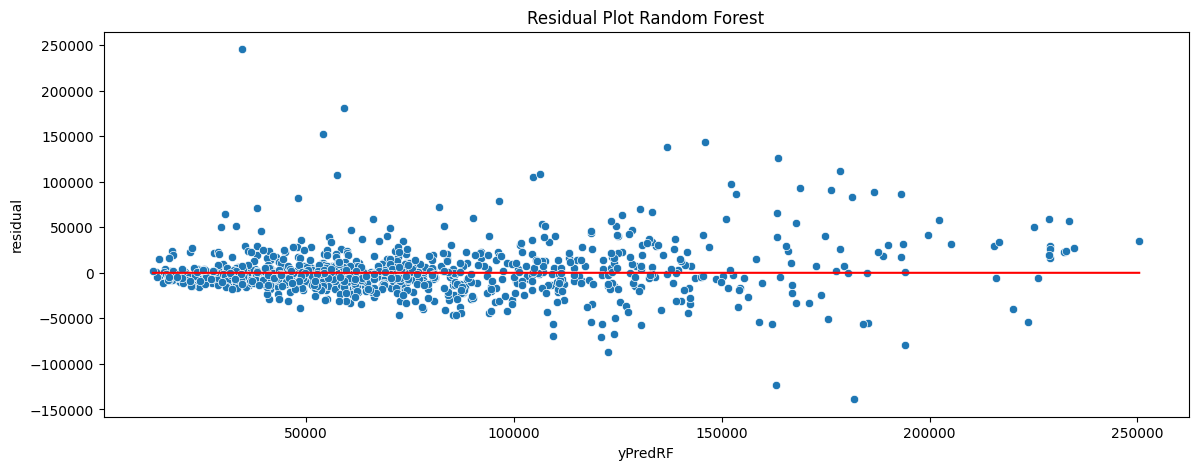

In [98]:
residual = y_test - y_pred_RF_tuning

dfResidual = pd.DataFrame({'yPredRF': y_pred_RF_tuning,
                           'residual': residual})

dfResidualFull = pd.DataFrame({'yTestBike': y_test,
                               'yPredRF': y_pred_RF_tuning,
                               'residual': residual})
display(dfResidualFull,
        dfResidual)

plt.figure(figsize=(14,5))
sns.scatterplot(data=dfResidual, x='yPredRF', y='residual')
sns.lineplot(data=dfResidual, x='yPredRF', y=0, color='red')
plt.title('Residual Plot Random Forest')
plt.show()

In [162]:
over_150 = len(df) - len(df[df['Price']<=150000])
print(f'The total number of cars with prices above 150,000 is {over_150}, or {(over_150/len(df))*100}% from total data.')

The total number of cars with prices above 150,000 is 310, or 8.60871980005554% from total data.


Based on the residual plot above, the residuals appear to be clustered closely around the 0-150,000 range on the horizontal axis before scattering more widely. From this residual plot, we can infer that the RandomForest model is less optimal in predicting high-end cars (market prices >150,000). However, it's essential to consider other factors, such as the train set data being concentrated in the price range of 0-150,000 for a more accurate interpretation.

## Best Model

Based on the comparison between the two models after hyperparameter tuning, the XGBoost (XGB) model with its specific set of parameters emerges as the preferred choice. The decisive factor lies in the larger performance delta between the models, and notably, the XGB model already exhibited superior performance from the outset. This significant difference in performance metrics makes the XGB model the clear winner, substantiating its suitability for the task at hand.

Berikut adalah model dalam bentuk siap pakai:

In [100]:
random_xgb.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('scaler', RobustScaler(),
                                                  ['Year', 'Mileage'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None,...
                              feature_types=None, gamma=10, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.07,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=183,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=98, ...))])

Berikut adalah detail parameter terbaik untuk model xgb yang terpilih:

In [105]:
random_xgb.best_params_

{'model__subsample': 0.6,
 'model__reg_alpha': 10.0,
 'model__n_estimators': 183,
 'model__max_depth': 6,
 'model__learning_rate': 0.07,
 'model__gamma': 10,
 'model__colsample_bytree': 0.7}

## Conclusion

The model's findings highlight that the most influential features in predicting used car prices are Make, Engine Size, and Year. To assess the model's performance, three evaluation metrics were utilized: RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error). After fine-tuning the hyperparameters for each metric, the final values obtained were **22,909.346424 for RMSE**, **13,425.587794 for MAE**, and **0.222047 for MAPE** respectively.

The significance of the MAE value lies in its indication that, on average, the model's price predictions may diverge by approximately 13,425.587794 SAR **from the actual prices of used cars**. However, it is important to note that the predictions could occasionally deviate significantly from the true values due to potential biases within the model. Also the fact that the data in itself not well distributed.

Regarding feature importance, a notable observation is that all the features hold significance in predicting the target variable. None of the features possess a value of 0, implying that each of them contributes meaningfully to the model's predictive power. This underscores the importance of the entire feature set in accurately forecasting the outcome, leaving no room for redundant or unimportant variables.

The model's predictions for prices above 150,000 become more uncertain compared to those below the threshold because there is a limited number of cars with prices in that higher range. The scarcity of data points in the upper price bracket makes it challenging for the model to generalize effectively and accurately predict prices for such high-value vehicles. As a result, the predictions for cars above the threshold may exhibit greater variability or shakiness due to the lack of sufficient training examples in that price range.

While the model holds potential for further enhancement through additional processes, for the present moment, we presume that the model has achieved the desired level of performance. It is crucial to emphasize that during the model development process, in-depth knowledge of cars plays a vital role in facilitating the creation of a more refined and accurate predictive model.

## Recommendation

The following are recommendations that can be given to maximize the final model and help PT Yalla-Shoot Motor to make a more accurate prediction:

* Added several features such as "Car Colour", "Official Car Warranty", "Car Condition" etc. which logically have a very large correlation in determining the price of a used car.
* The data distribution needs to be enriched. The addition of the amount of data needs to be given attention to the car brands which are few in number and the price is expensive. The small amount of data greatly affects the final model results obtained for a small number of car brands. In addition, data for cars more than 150,000 Riyals should be prioritize in order to make the model more stable.
* If additional significant data becomes available, exploring the utilization of more complex models, such as Recursive Neural Networks (RNNs) or CNN (Convolutional Neural Networks), could be a viable option. However, it is essential to consider that if the dataset remains relatively limited in terms of both data points and features, the potential for a substantial performance improvement through the use of a more complex model may not be substantial. In cases where the dataset's size and feature richness remain comparable to the current dataset, the benefits gained from employing a more intricate model might not be as prominent. It is crucial to strike a balance between model complexity and the available data, ensuring that the chosen model can effectively leverage the additional information without overfitting or sacrificing generalization capability. Keeping these considerations in mind will be crucial for making informed decisions in further refining the predictive model.

# **Save Machine Learning**

In [50]:
# Import pickle

import pickle as pickle

In [159]:
# Save Machine Learning

pipe_model = random_xgb.best_estimator_
pipe_model.fit(X_train,y_train)

pickle.dump(pipe_model,open('Model_CarUsed_Syara.sav','wb'))

In [161]:
random_xgb.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('scaler', RobustScaler(),
                                                  ['Year', 'Mileage'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None,...
                              feature_types=None, gamma=10, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.07,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=183,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=98, ...))])